In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df = pd.read_excel("../data/bq-results-20240105-112143-1704453779417.xlsx")

df.columns = df.columns.str.lower()
for c in df.select_dtypes("object").columns:
    df[c] = df[c].str.strip().str.lower()


df.head()

,userid,amount,usercurrencyamount,usercurrencycode,provider,countrycode,market,coins
0,049d2b63-a415-4a72-a9de-ce4ab621945d,2.53,2.01,chf,paypal,ch,gb,332
1,c14dfe23-2763-4ed4-8970-ef9da9d294ad,1.28,1.10,chf,paypal,ch,gb,7988
2,b6779fec-96f6-4386-a60c-70b64a3b40e6,2.60,2.34,eur,paypal,at,gb,538
3,ffb941d3-6ea6-4635-afe9-49d7af1349a9,3.83,5.66,aud,paypal,nz,au,1685
4,be50b2d4-4782-4258-a4fa-ecf38a100219,1.24,12.83,nok,paypal,no,gb,1516


In [4]:
# Limits of numerical columns

df.describe().round(3)

,amount,usercurrencyamount,coins
count,54928.000,54928.000,5.492800e+04
mean,2.612,5.576,5.490774e+05
std,3.256,38.528,2.749168e+07
min,0.000,0.050,0.000000e+00
25%,0.760,0.960,2.100000e+02
50%,2.120,2.110,9.300000e+02
75%,2.860,3.030,3.850000e+03
max,60.000,2495.330,4.474490e+09


In [5]:
# Get number of unique values for categorical columns

for c in df.select_dtypes("object").columns:
    print(f"Column {c}: {df[c].nunique()} unique values")

Column userid: 25715 unique values
Column usercurrencycode: 12 unique values
Column provider: 12 unique values
Column countrycode: 23 unique values
Column market: 6 unique values


In [7]:
# Checking for Nans values

df.isnull().sum()

userid                0
amount                0
usercurrencyamount    0
usercurrencycode      0
provider              0
countrycode           0
market                0
coins                 0
dtype: int64

<Axes: xlabel='amount', ylabel='Count'>

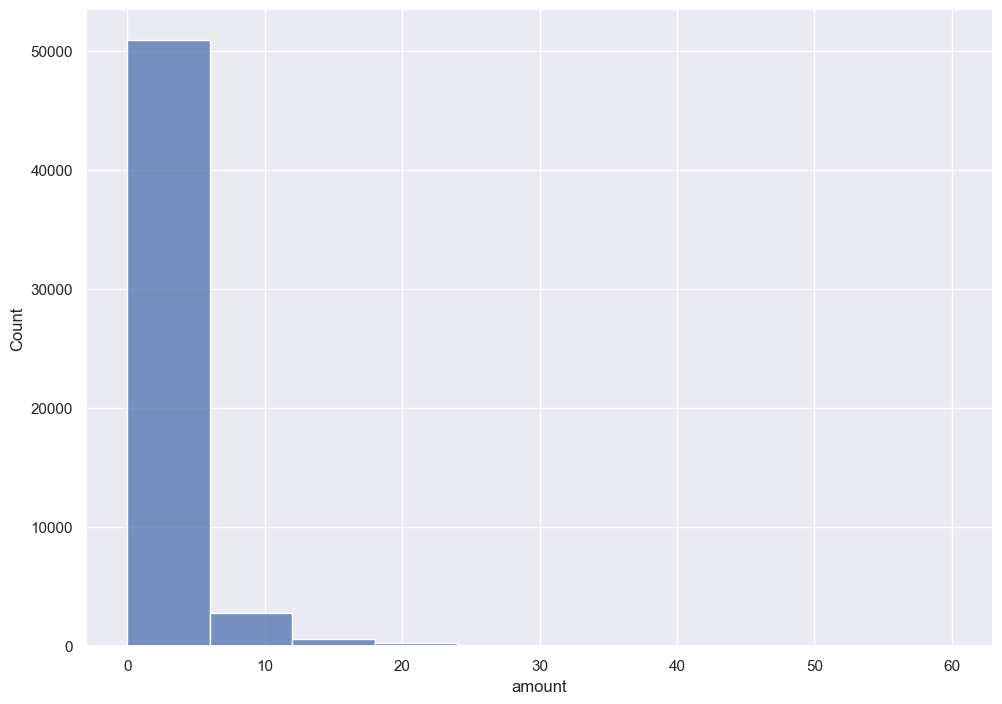

In [14]:
# Checking distribution of 'amount'
sns.histplot(data=df, x="amount", bins=10)

<Axes: xlabel='amount', ylabel='Count'>

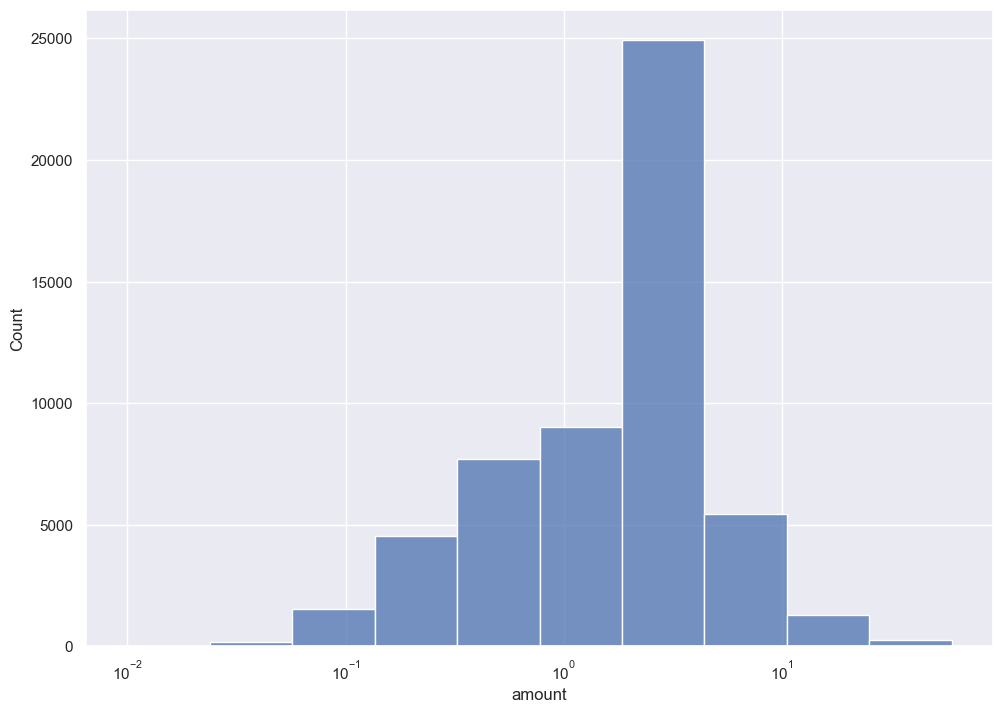

In [15]:
# A highly skwewed distribution of 'amount' with a long right tail is expected since payments over 10$ are extreme rarities

sns.histplot(data=df, x="amount", bins=10, log_scale=True)

<Axes: xlabel='usercurrencycode', ylabel='amount'>

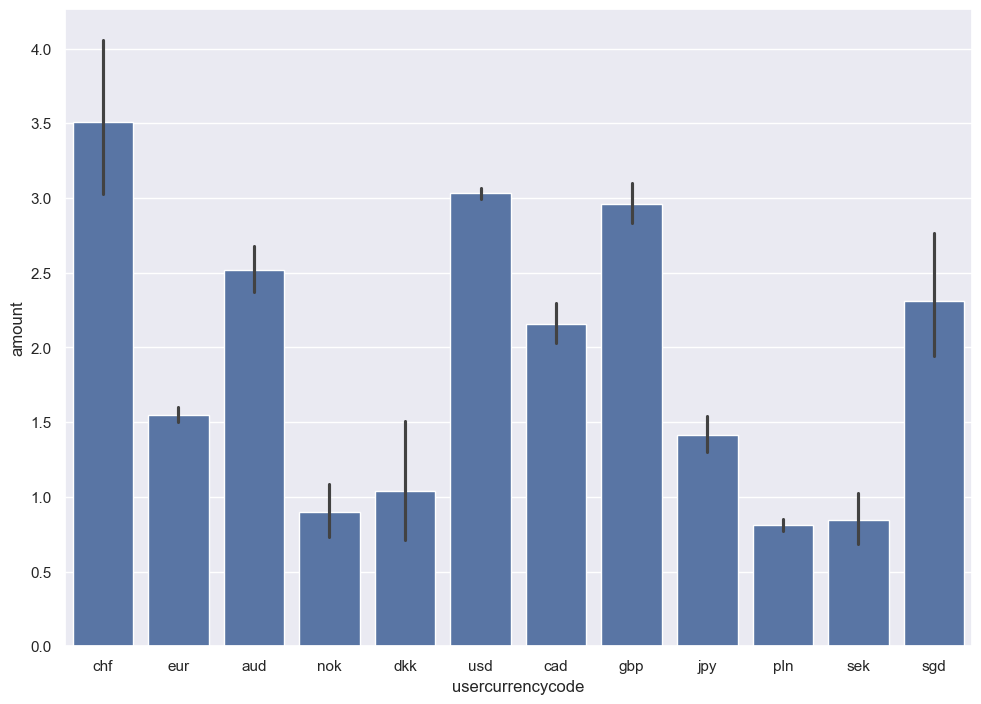

In [16]:
# Display totoal 'amount' grouped by 'usercurrencycode'

sns.barplot(data=df, x="usercurrencycode", y="amount")

<Axes: >

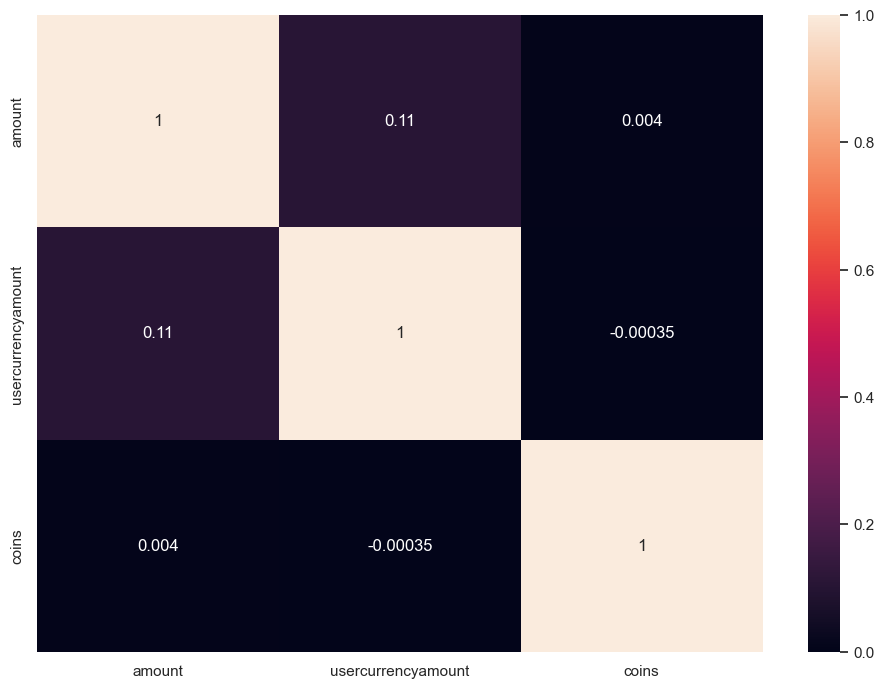

In [18]:
# Correlation heatmap

num = df.select_dtypes(exclude="object").columns
sns.heatmap(df[num].corr(), annot=True)

In [23]:
df.to_csv("../data/clean_data.csv", index=False)